In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Let's run calibration...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from LeCheapEyeTracker import Client, Server

In [3]:
fps = 30
T = 9.

calib = Client(et=Server(), timeline=np.linspace(0, T, T*fps), downscale=2)
calib.app.run()
calib.et.close()

window size :  (2560, 1440)
target dynamic :
 [(0.5, 0.012645959854125977), (0.5, 0.261929988861084), (0.5, 0.3780710697174072), (0.5, 0.49718594551086426), (0.5, 0.6141788959503174), (0.5, 0.7270700931549072), (0.5, 0.842108964920044), (0.5, 0.9559550285339355), (0.67, 1.0684869289398193), (0.67, 1.1839540004730225), (0.67, 1.2968590259552002), (0.67, 1.4119009971618652), (0.67, 1.525386095046997), (0.67, 1.640660047531128), (0.67, 1.7546560764312744), (0.67, 1.8692660331726074), (0.67, 1.9822020530700684), (0.33, 2.096813917160034), (0.33, 2.2102999687194824), (0.33, 2.3241069316864014), (0.33, 2.439352035522461), (0.33, 2.5542869567871094), (0.33, 2.6688249111175537), (0.33, 2.783323049545288), (0.33, 2.89902400970459), (0.67, 3.012115955352783), (0.67, 3.1287291049957275), (0.67, 3.244128942489624), (0.67, 3.358880043029785), (0.67, 3.472256898880005), (0.67, 3.5865490436553955), (0.67, 3.6996800899505615), (0.67, 3.8134419918060303), (0.67, 3.926758050918579), (0.5, 4.042025089263

/usr/local/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)


In [4]:
stim_x = np.array([])
eye_x = np.array([])

for stim in calib.stims_X_t:
    x, stash = stim
    stim_x = np.append(stim_x, x)
    
for eye in calib.et.eye_x_t:
    y, stash = eye
    eye_x = np.append(eye_x, y)

print (len(stim_x)==len(eye_x))

True


## ...and plot eye and targets x_positions 

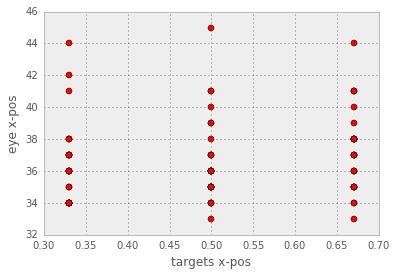

In [5]:
plt.plot(stim_x, eye_x, 'ro')
plt.xlabel('targets x-pos')
plt.ylabel('eye x-pos')
plt.show()

## We must get the mean of eye position for each stimulus position

In [6]:
i = 0
center = np.array([])
left = np.array([])
right = np.array([])

while i <= len(stim_x) - 1 :
    value = stim_x[i]
    if value == 0.33 :
        left = np.append(left, eye_x[i])
    elif value == 0.5 :
        center = np.append(center, eye_x[i])
    else :
        right = np.append(right, eye_x[i])
    i += 1

c_mean = np.mean(center)
l_mean = np.mean(left)
r_mean = np.mean(right)
        

In [7]:
print (l_mean)

36.56


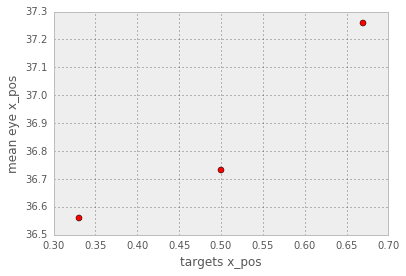

In [8]:
plt.plot([0.33, 0.5, 0.67], [l_mean, c_mean, r_mean], 'ro')
plt.xlabel('targets x_pos')
plt.ylabel('mean eye x_pos')
plt.show()

! git commit -am 'Much better'

! git status

! git push